Lib importieren 

In [2]:
import pandas as pd
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt


Pfad bestimmen

In [3]:
import os 
print(os.getcwd())

/workspaces/ITDS_01/Hausaufgabe_zu_KW46


Umsatzdaten einlesen:

In [4]:
df_umsatz = pd.read_csv("/workspaces/ITDS_01/Daten/umsatzdaten_gekuerzt.csv")
df_wetter = pd.read_csv("/workspaces/ITDS_01/Daten/wetter.csv")

Datensatz begutachten:

In [5]:
df_umsatz.head()
#Anzahl je Warengruppe ausgeben: 
df_umsatz['Warengruppe'].value_counts()
#Gesamtanzahl ausgeben
#df_umsatz['Warengruppe'].count()
#df_wetter.head()

Warengruppe
1    1819
2    1819
3    1819
5    1819
4    1766
6     292
Name: count, dtype: int64

Datum auf Wochentage mappen, 
Reihenfolge festlegen, 
Durchschnitt vom Umsatz pro Wochentag berechnen
Werte begutachten

In [6]:
#order der Wochentage
wochentage_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#Wetterdaten
df_wetter['Datum'] = pd.to_datetime(df_wetter['Datum'])
df_wetter['Wochentag'] = df_wetter['Datum'].dt.day_name()
df_wetter['Wochentag'] = pd.Categorical(df_wetter['Wochentag'], categories=wochentage_order, ordered=True)
wochentag_dtemp = df_wetter.groupby('Wochentag')['Temperatur'].mean().reindex(wochentage_order)

print(wochentag_dtemp)

Wochentag
Monday       11.961784
Tuesday      12.061243
Wednesday    12.175906
Thursday     12.112185
Friday       12.110179
Saturday     12.060121
Sunday       12.218906
Name: Temperatur, dtype: float64


/tmp/ipykernel_2120/2905758696.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wochentag_dtemp = df_wetter.groupby('Wochentag')['Temperatur'].mean().reindex(wochentage_order)


In [7]:
#UmsatzDaten
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])
df_umsatz['Wochentag'] = df_umsatz['Datum'].dt.day_name()
#print(df_umsatz.head())
df_umsatz['Wochentag'] = pd.Categorical(df_umsatz['Wochentag'], categories=wochentage_order, ordered=True)
wochentag_summe = df_umsatz.groupby('Wochentag')['Umsatz'].mean().reindex(wochentage_order)

print(wochentag_summe)


Wochentag
Monday       193.688449
Tuesday      187.944440
Wednesday    187.477523
Thursday     193.232274
Friday       196.796023
Saturday     241.319882
Sunday       246.495651
Name: Umsatz, dtype: float64


/tmp/ipykernel_2120/4089959516.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wochentag_summe = df_umsatz.groupby('Wochentag')['Umsatz'].mean().reindex(wochentage_order)


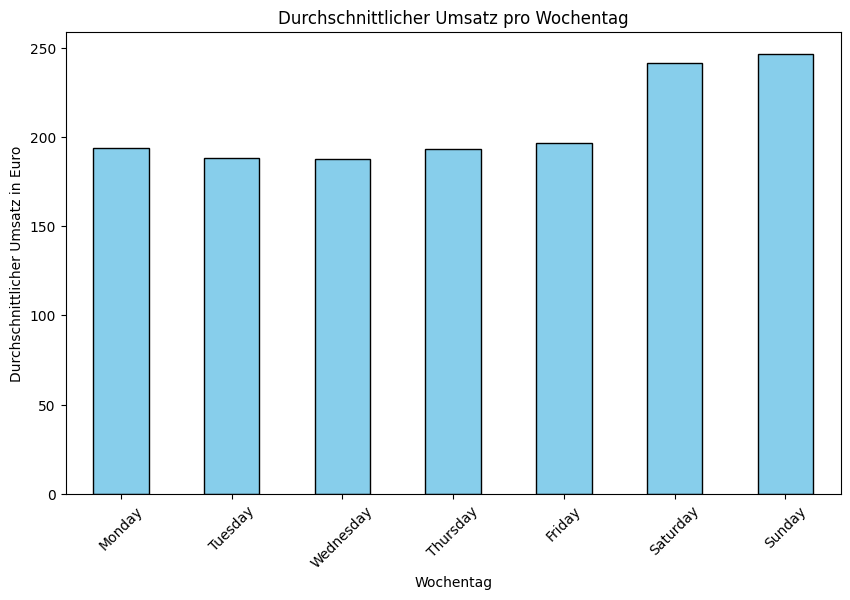

In [8]:
plt.figure(figsize=(10, 6))
wochentag_summe.plot(kind='bar', color='skyblue', edgecolor='black')

# Titel und Achsenbeschriftungen hinzufügen
plt.title("Durchschnittlicher Umsatz pro Wochentag")
plt.xlabel("Wochentag")
plt.ylabel("Durchschnittlicher Umsatz in Euro")

# Diagramm anzeigen
plt.xticks(rotation=45)  # Drehe die Beschriftung der X-Achse um 45 Grad
plt.show()

In [23]:
merged_df = pd.merge(df_wetter, df_umsatz, how='inner', on=['Datum','Wochentag'])
#print(df_wetter.head())
#print(df_umsatz.head())
#print(merged_df)
merged_df.head()

,Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Wochentag,Warengruppe,Umsatz
0,2013-07-01,6.0,17.8375,15,20.0,Monday,1,148.828353
1,2013-07-01,6.0,17.8375,15,20.0,Monday,2,535.856285
2,2013-07-01,6.0,17.8375,15,20.0,Monday,3,201.198426
3,2013-07-01,6.0,17.8375,15,20.0,Monday,4,65.890169
4,2013-07-01,6.0,17.8375,15,20.0,Monday,5,317.475875
